# Predicting the Programming Languages of the Most Starred Github Repos
**by Daniel Guerrero and Yvonne King**

**Quick Notebook Reference**

1. Project Plan
2. Imports
3. Acquire
4. Prep
5. Exploration
6. Models
7. Model Evaluation
8. Final Conclusions

## Project Plan

**Acquisition, Prep, and Initial Exploration**
- Fetch Data from local cache
- Handle Missing Values
- Remove/repair erroneous data
- Look at shape of data
- normalize data by removing non ASCII characters
- tokenize words
- stem and lemmatize words
- remove stop words

**Exploration**

- Answer the following questions:
    - What are the most common words in READMEs?
    - What does the distribution of IDFs look like for the most common words?
    - Does the length of the README vary by programming language?
    - Do different programming languages use a different number of unique words?
    
**Modeling**
- Build a model that can predict what programming language a repository is, based on the text of the README file

## Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

import re

from requests import get
from bs4 import BeautifulSoup
import os
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt


import nltk
import nltk.sentiment
from wordcloud import WordCloud

import acquire
import prepare
import explore
import model

## Acquire
- We ran the acquire.py file in command line to generate the json file that we used to save on computing time
    - This file has functions that scrape Githup repos and pull in the readme file contents along with the programming language of the repo
- Fetched data from local cache

In [2]:
#read in data
df = pd.read_json("data.json")

In [3]:
#take a look at the shape of our data
df.shape

(248, 3)

In [4]:
#check for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 3 columns):
repo               248 non-null object
language           215 non-null object
readme_contents    248 non-null object
dtypes: object(3)
memory usage: 5.9+ KB


In [5]:
#look at dataframe structure
df.head(5)

,repo,language,readme_contents
0,vuejs/vue,JavaScript,"<p align=""center""><a href=""https://vuejs.org"" ..."
1,EbookFoundation/free-programming-books,None,This page is available as an easy-to-read webs...
2,tensorflow/tensorflow,C++,"<div align=""center"">\n <img src=""https://www...."
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot..."
4,sindresorhus/awesome,None,"<div align=""center"">\n\t<img width=""500"" heigh..."


## Prep
Using the prep_readme_function we will:
- normalize data by removing non ASCII characters
- tokenize words
- lemmatize words
- remove stop words

In [6]:
#function to prepare our data for modeling
df = prepare.prep_readme_data(df)

In [7]:
df.describe()

,repo,language,readme_contents,clean_tokes,clean_lemmatized
count,248,215,248,248,248
unique,248,26,248,248,248
top,TryGhost/Ghost,JavaScript,# axios\n\n[![npm version](https://img.shields...,"[pure, purehttpscloudgithubusercontentcomasset...",freecodecamporg social bannerhttpss3amazonawsc...
freq,1,73,1,1,1


In [8]:
#look at dataframe structure
df.head(5)

,repo,language,readme_contents,clean_tokes,clean_lemmatized
0,vuejs/vue,JavaScript,"<p align=""center""><a href=""https://vuejs.org"" ...","[p, aligncentera, hrefhttpsvuejsorg, target_bl...",p aligncentera hrefhttpsvuejsorg target_blank ...
1,EbookFoundation/free-programming-books,None,This page is available as an easy-to-read webs...,"[this, page, is, available, as, an, easytoread...",page available easytoread website httpsebookfo...
2,tensorflow/tensorflow,C++,"<div align=""center"">\n <img src=""https://www....","[div, aligncenter, img, srchttpswwwtensorflowo...",div aligncenter img srchttpswwwtensorfloworgim...
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...","[p, aligncenter, a, hrefhttpsgetbootstrapcom, ...",p aligncenter hrefhttpsgetbootstrapcom img src...
4,sindresorhus/awesome,None,"<div align=""center"">\n\t<img width=""500"" heigh...","[div, aligncenter, &#9;, img, width500, height...",div aligncenter &#9; img width500 height350 sr...


In [9]:
#Take a look at languages
df.language.value_counts(dropna=False)

JavaScript          73
NaN                 33
Python              27
Java                20
TypeScript          17
Go                  12
C++                 12
C                    6
Swift                5
HTML                 4
Rust                 4
PHP                  4
Vue                  4
Shell                4
Ruby                 3
CSS                  3
Kotlin               3
Clojure              2
Jupyter Notebook     2
Objective-C          2
Dart                 2
Emacs Lisp           1
OCaml                1
Assembly             1
C#                   1
Haskell              1
TeX                  1
Name: language, dtype: int64

- There are a few missing rows that are missing the programming language so will drop this columns by using the prepare_data function from prepare.py
- ALso based on the first glance of the language distrobutions we have decided to go with the more poplular languages JavaScript, Python, Java, C++ and have combined all other languages into a new variable other

In [10]:
#drop na and create is_top_language column
df = prepare.prepare_data(df)

In [11]:
#peek at the datafram
df.head(5)

,repo,language,readme_contents,clean_tokes,clean_lemmatized,is_top_language
13,airbnb/javascript,JavaScript,# Airbnb JavaScript Style Guide() {\n\n*A most...,"[airbnb, javascript, style, guide, a, mostly, ...",airbnb javascript style guide mostly reasonabl...,JavaScript
14,flutter/flutter,Dart,# [![Flutter logo][]][flutter.dev]\n\n[![Build...,"[flutter, logoflutterdev, build, status, cirru...",flutter logoflutterdev build status cirrusbuil...,other
15,d3/d3,JavaScript,"# D3: Data-Driven Documents\n\n<a href=""https:...","[d3, datadriven, documents, a, hrefhttpsd3jsor...",d3 datadriven document hrefhttpsd3jsorgimg src...,JavaScript
16,torvalds/linux,C,Linux kernel\n============\n\nThere are severa...,"[linux, kernel, there, are, several, guides, f...",linux kernel several guide kernel developer us...,other
18,jackfrued/Python-100-Days,Jupyter Notebook,## Python - 100天从新手到大师\n\n> **作者**：骆昊\n>\n> **...,"[python, 100, 8w15pythoncore50courseshttpsgith...",python 100 8w15pythoncore50courseshttpsgithubc...,other


In [12]:
#Take a look at languages again using our new column
df.is_top_language.value_counts(dropna=False)

other         60
JavaScript    45
Python        21
Java          17
C++           11
Name: is_top_language, dtype: int64

## Exploration

### Distribution of Data
- Here we looked at the distribution of data so we could get a feel for the data

In [13]:
# Quick dataframe to view the distribution of all languages
pd.concat(
    [df.language.value_counts(), df.language.value_counts(normalize=True)], axis=1
    ).set_axis(['n', 'percent'], axis=1, inplace=False)

,n,percent
JavaScript,45,0.292208
Python,21,0.136364
Java,17,0.110390
C++,11,0.071429
Go,11,0.071429
TypeScript,10,0.064935
C,6,0.038961
HTML,4,0.025974
Ruby,3,0.019481
Rust,3,0.019481


In [14]:
# Quick dataframe to view the distribution of our top languages
pd.concat(
    [df.is_top_language.value_counts(), df.is_top_language.value_counts(normalize=True)], axis=1
    ).set_axis(['n', 'percent'], axis=1, inplace=False)

,n,percent
other,60,0.389610
JavaScript,45,0.292208
Python,21,0.136364
Java,17,0.110390
C++,11,0.071429


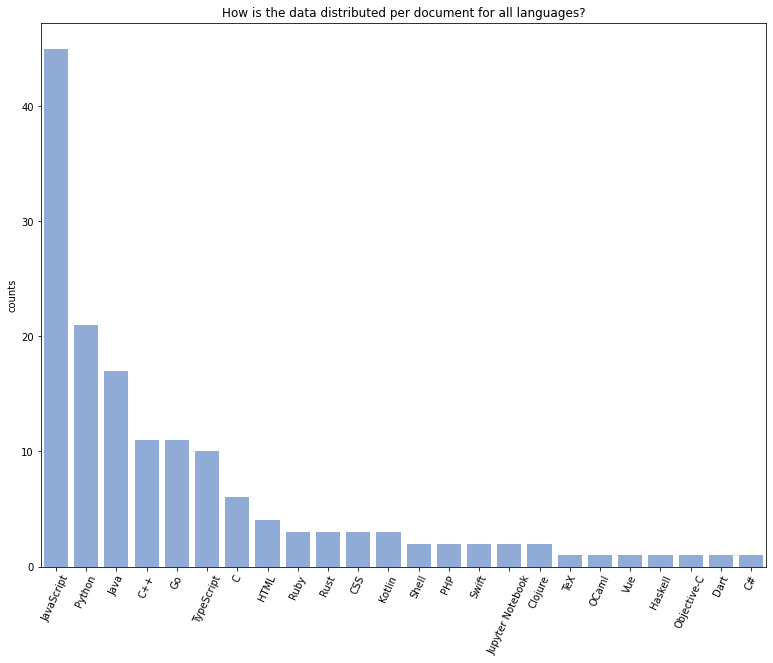

In [15]:
#plot the distros for all languages
explore.plot_distro_for_value_counts_all(df)

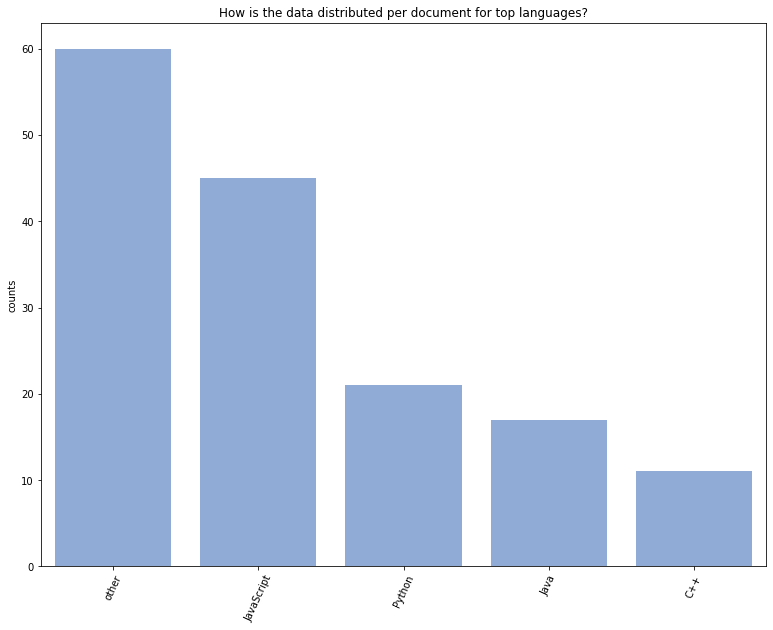

In [16]:
#plot the distros for top languages
explore.plot_distro_for_value_counts_top(df)

### REAMDE lengths by language

**Question Asked:** 

Does the length of the README vary by programming language?

**Answers** 
- It looks like most readmes have under 25k characters
- Pyhton and Swift seem to have a few outliers
- Overall the length of the readme's seem to be relatively similar

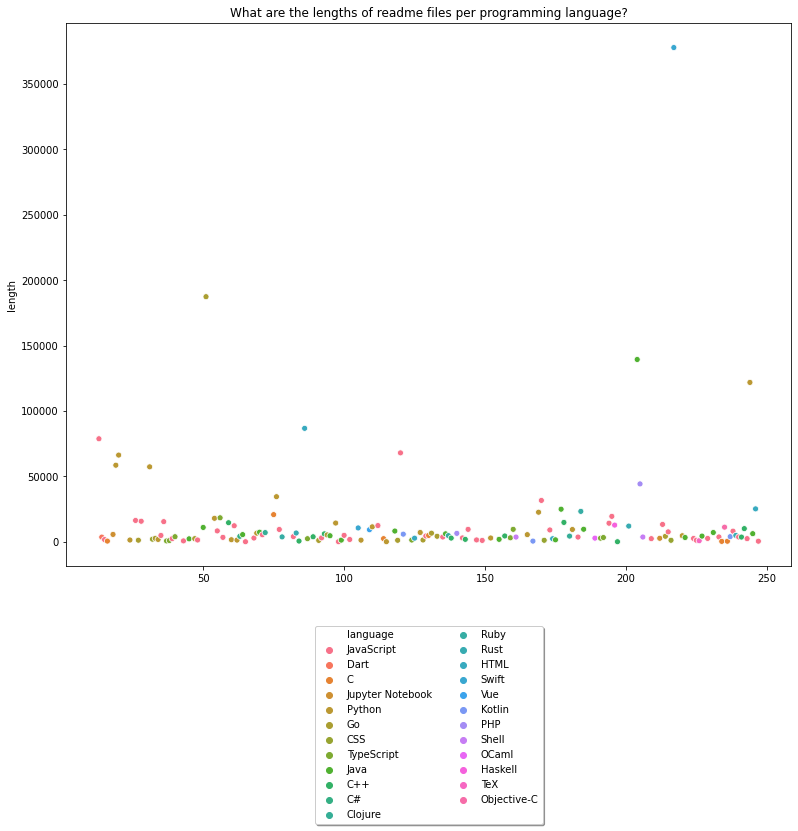

In [17]:
#scatterplot visual of the various readmes lengths hued language
explore.scatterplot_for_readmes(df)

#### Lets take a look at the medians, min, and max

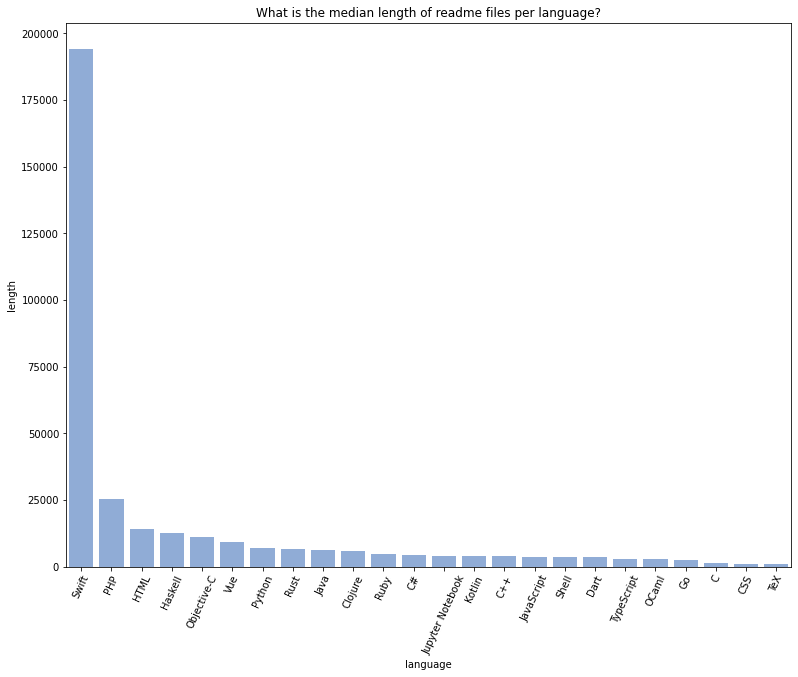

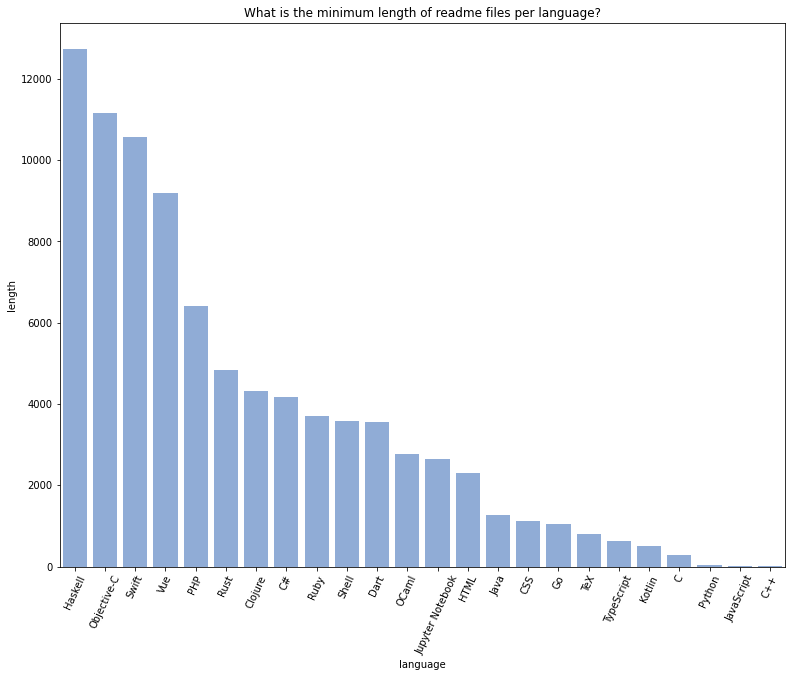

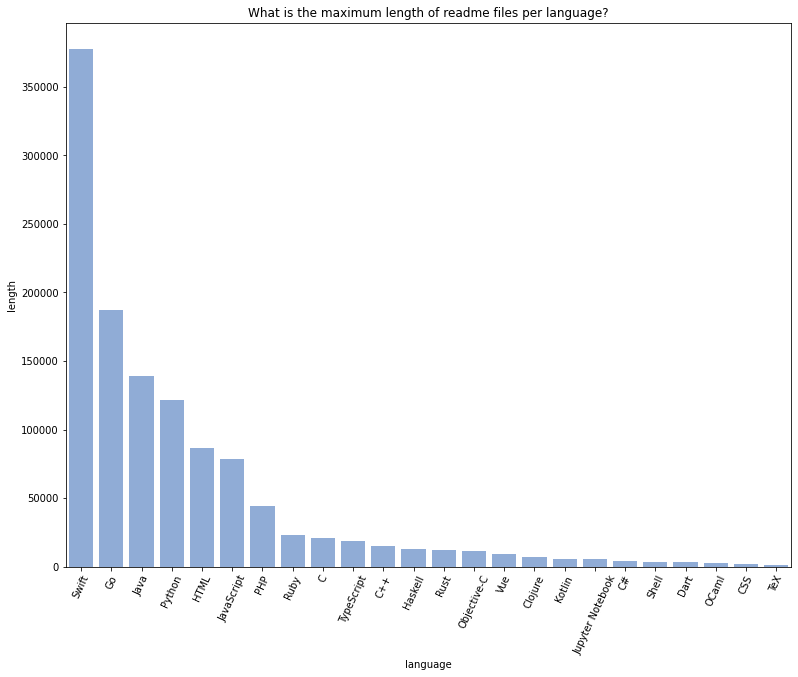

In [18]:
#function to plot the lengths o the readmes for all the languages
explore.bargraphs_for_min_max_median(df)

In [19]:
#Quick dataframe of the top programming languages
explore.word_count_summary(df)

,Min Word Count,Max Word Count,Median Word Count,Mean Word Count,STD of Word Count
is_top_language,,,,,
C++,2,1713,289.0,513.363636,547.816442
Java,124,10851,389.0,1006.235294,2544.756509
JavaScript,1,7587,370.0,807.666667,1324.018230
Python,3,10258,801.0,2093.285714,2803.159631
other,37,21339,333.5,1321.033333,3613.523896


### Unique Words

**Question:**

Do different programming languages use a different number of unique words?

**Answer:**
- The other programming languages have more unique words but this is most likely due the fact that we combined languages
- Python seems to have the greatest number of unique words

In [20]:
#use function to create a list of all words for top languages
javascript_words, python_words, java_words, cpp_words, other_words, all_words = explore.list_of_words_for_top_languages(df, language="is_top_language", cleaned="clean_lemmatized")

In [21]:
#print out the unique number of words per language
js_nunique = pd.Series(javascript_words).nunique()
py_nunique = pd.Series(python_words).nunique()
java_nunique = pd.Series(java_words).nunique()
cpp_nunique = pd.Series(cpp_words).nunique()
other_nunique = pd.Series(other_words).nunique()

print(f"Java Svript readmes have {js_nunique:,} unique words")
print(f"Pyhton readmes have {py_nunique:,} unique words")
print(f"Java readmes have {java_nunique:,} unique words")
print(f"C++ readmes have {cpp_nunique:,} unique words")
print(f"The other programming languages have {other_nunique:,} unique words in their readmes")

Java Svript readmes have 9,826 unique words
Pyhton readmes have 10,868 unique words
Java readmes have 6,660 unique words
C++ readmes have 2,132 unique words
The other programming languages have 18,795 unique words in their readmes


### Bigrams

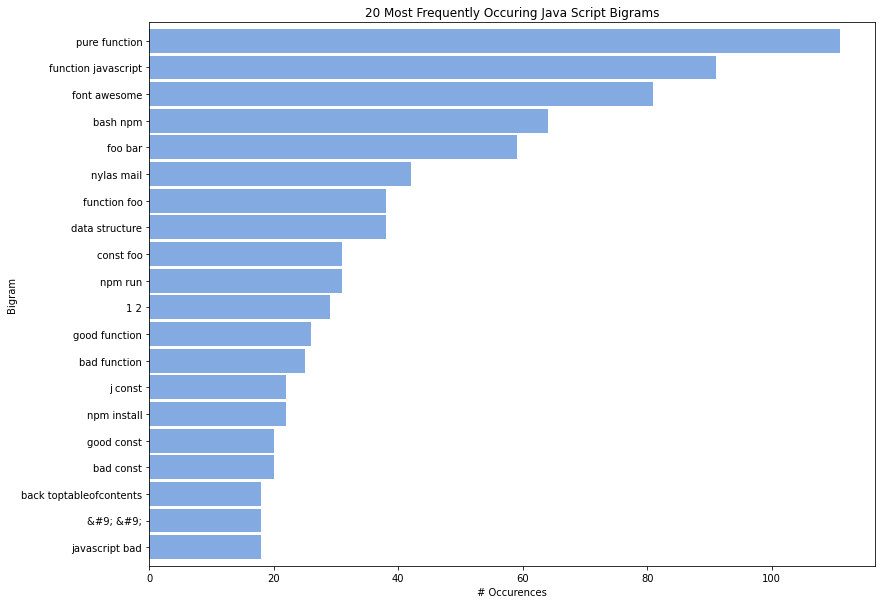

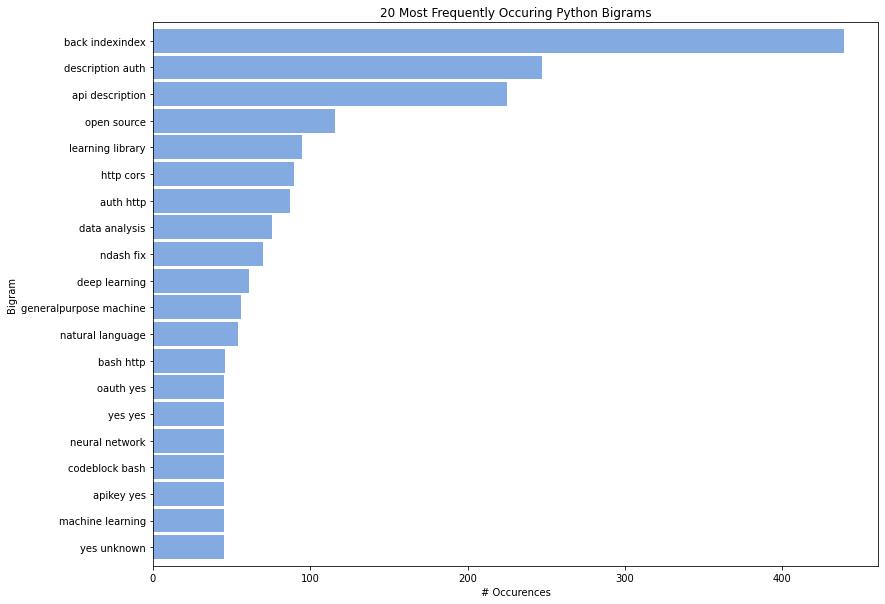

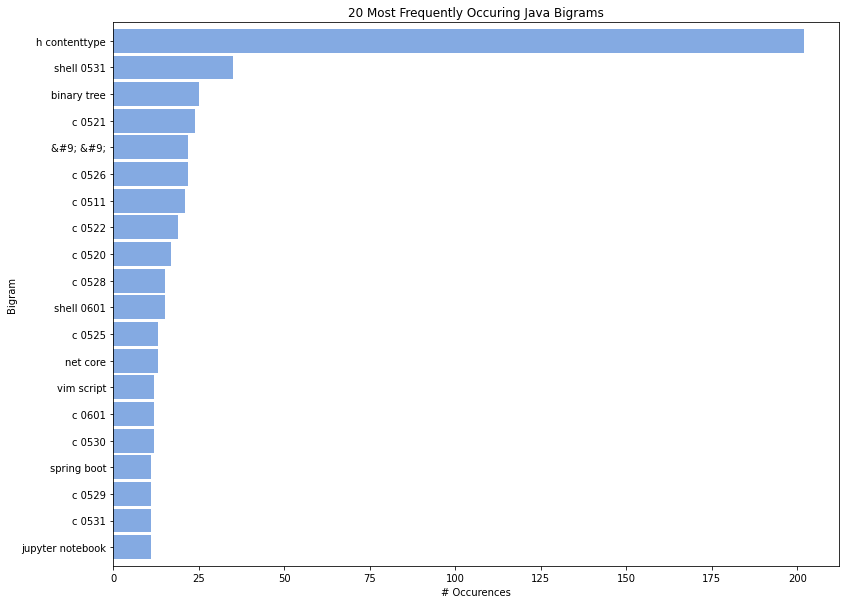

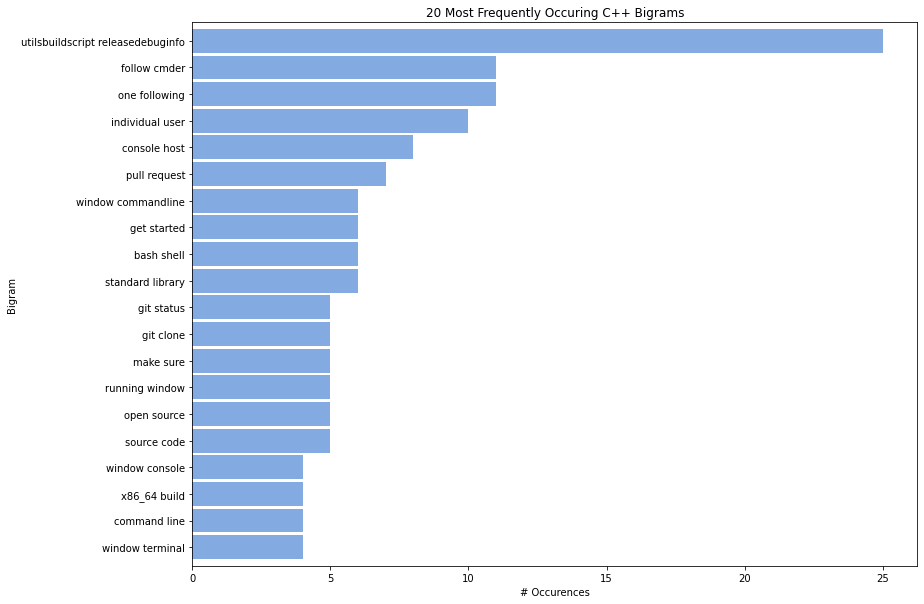

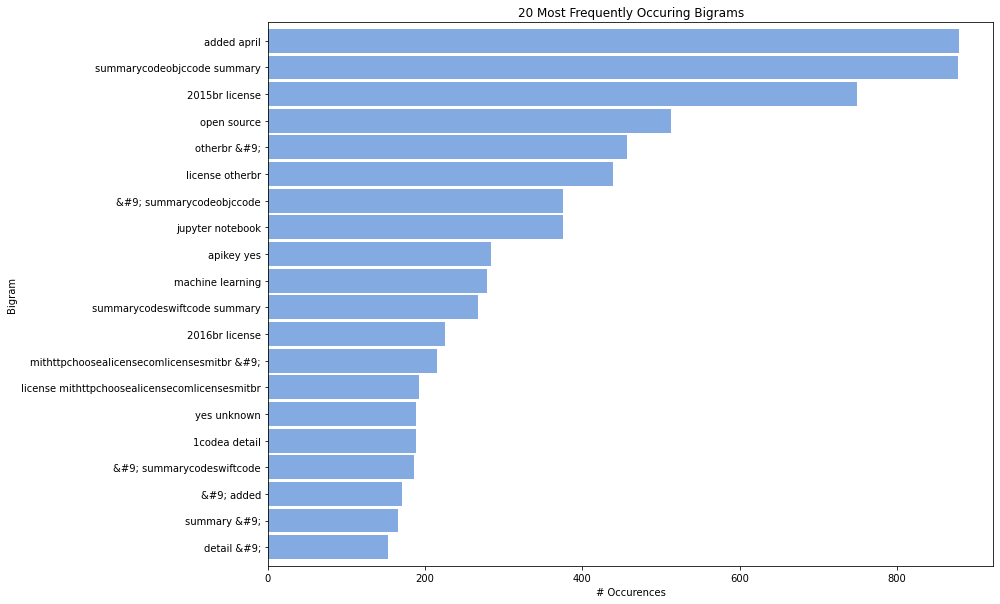

In [22]:
#plot the bigrams for top languages
explore.plot_bigrams(df)

In [23]:
#create list of top 20 bugrams for each variable in top languages
top_20_bigrams, top_20_js_bigrams, top_20_p_bigrams, top_20_j_bigrams, top_20_cpp_bigrams, top_20_other_bigrams = explore.create_bigrams(df)

### Word Clouds

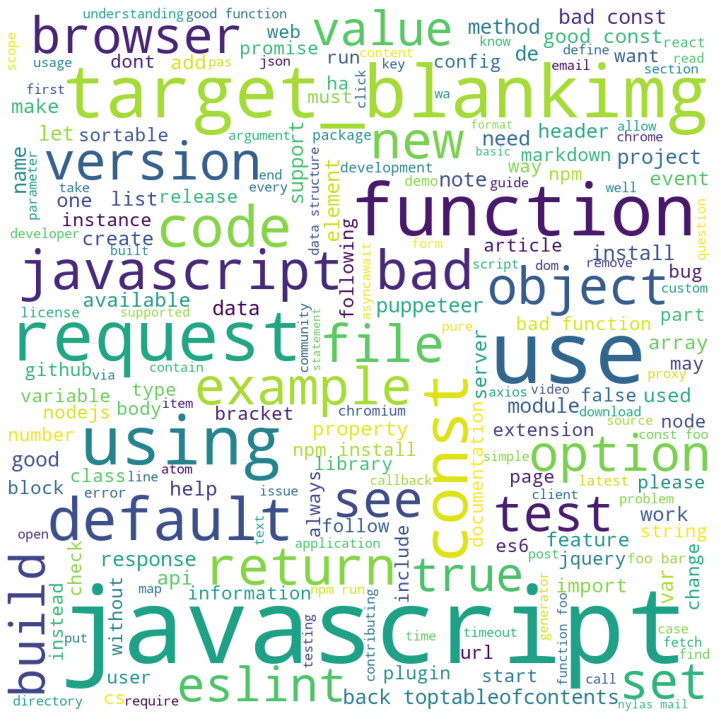

In [25]:
#Java Script word cloud
explore.word_cloud(javascript_words)

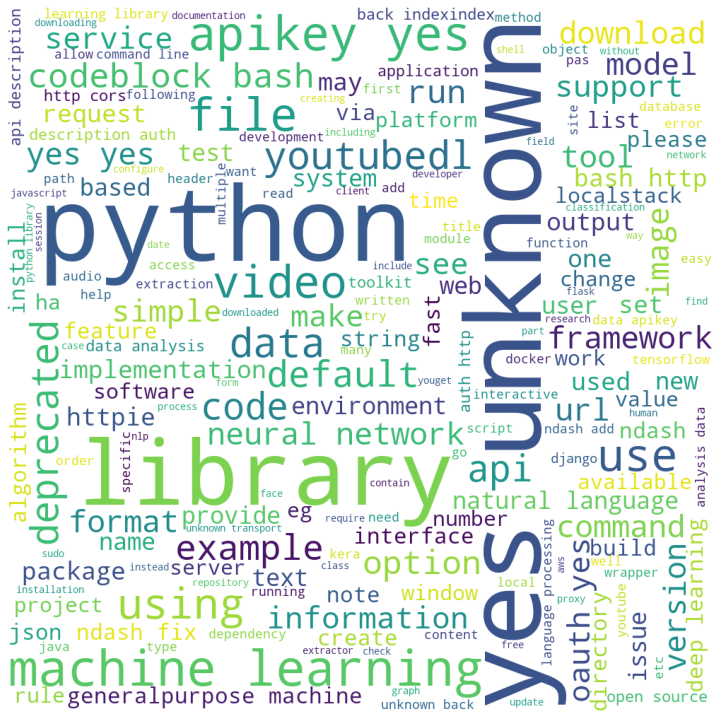

In [26]:
#Pyhton word cloud
explore.word_cloud(python_words)

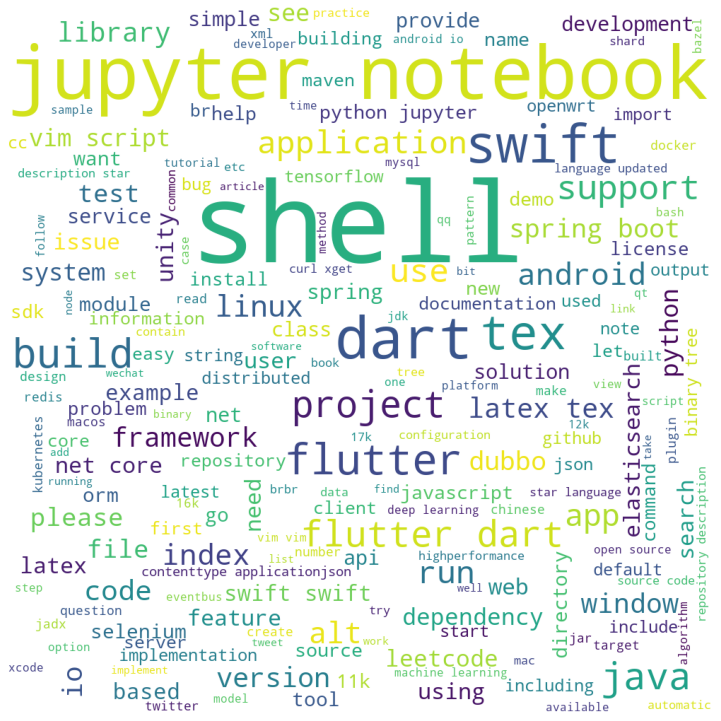

In [27]:
#Java word cloud
explore.word_cloud(java_words)

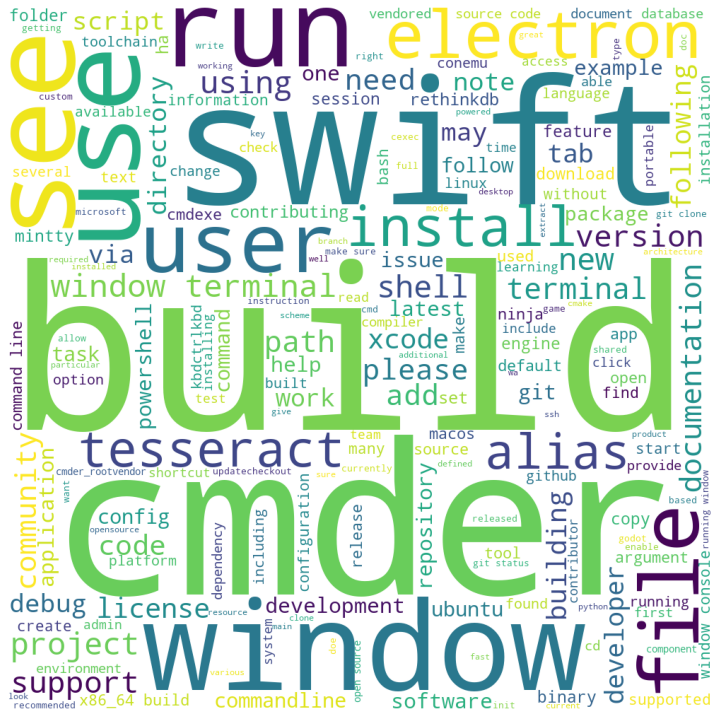

In [29]:
#C++ word cloud
explore.word_cloud(cpp_words)